In [91]:
!pip install qiskit
!pip install qiskit-braket-provider

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com


In [92]:
from qiskit import *
from qiskit import QuantumCircuit
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from qiskit.visualization import plot_histogram
from MerminPeres import MerminPeresCircuit
import qiskit_braket_provider
from qiskit_braket_provider import AWSBraketProvider
import time
from matplotlib.pyplot import axhline

Simulating the MerminPeresCircuit for each possible combination of x and y. Since this is a noiseless simulation, we expect to measure '0000' everytime

{'0000': 1024}
{'0000': 1024}
{'0000': 1024}
{'0000': 1024}
{'0000': 1024}
{'0000': 1024}
{'0000': 1024}
{'0000': 1024}
{'0000': 1024}


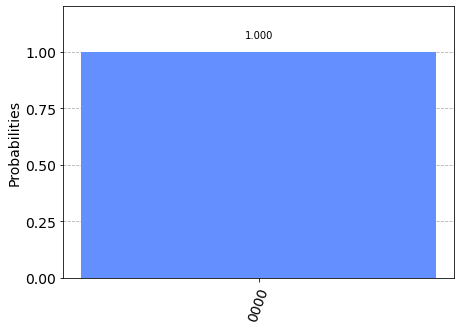

In [2]:
backend = Aer.get_backend('qasm_simulator')

for X in range(3):
        
    for Y in range(3):
    
        qc = MerminPeresCircuit(X, Y)
        
        t_qc = transpile(qc, backend)

        # Run and get counts
    
        job_sim = backend.run(t_qc, shots = 1024)
        result_sim = job_sim.result()
        counts = result_sim.get_counts(qc)
        print(counts) 
fig = plot_histogram(counts)

# Running on real devices

In [113]:
provider = AWSBraketProvider()

In [94]:
#ionq_device = provider.get_backend("IonQ Device")

#rigetti_device = provider.get_backend("Aspen-M-1")

#oqc_device = provider.get_backend("Lucy")

In [114]:
qdevice = "Lucy"
device = provider.get_backend('{0}'.format(qdevice)) 

In [15]:
qc = MerminPeresCircuit(1, 2)

ionq_task = device.run(qc, shots=1024)
ionq_arn = ionq_task.job_id()
ionq_retrieved = device.retrieve_job(job_id=ionq_arn)
ionq_retrieved.status()
#counts = ionq_retrieved.result().get_counts()
#fig = plot_histogram(counts)


<JobStatus.RUNNING: 'job is actively running'>

In [18]:
ionq_retrieved.status()

<JobStatus.DONE: 'job has successfully run'>

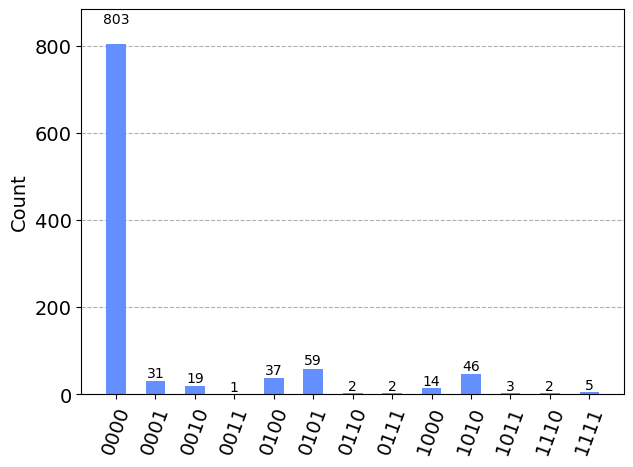

In [19]:
plot_histogram(ionq_retrieved.result().get_counts())

Running all situations in the Mermin-Peres game 

In [ ]:
def run_merminperes_on_device(qdevice, shots = 1024):
    
    device = AWSBraketProvider().get_backend('{0}'.format(qdevice))
    
    counts = {}
    
    for x in range(3):
        for y in range(3):
            print("Running on", qdevice, "for x =", x, "and y =", y)
            qc = MerminPeresCircuit(x, y)
        
            task = device.run(qc, shots=1024)
            retrieved_job = device.retrieve_job(job_id=task.job_id())
            retrieved_job.status()
        
            while retrieved_job.status() != 'COMPLETED':
                time.sleep(10) # Wait 10 seconds before querying job status again
                try:
                    counts["counts{0}{1}".format(x,y)] = retrieved_job.result().get_counts()
                    break
                except:
                    continue
        
            fig = plot_histogram(counts["counts{0}{1}".format(x,y)],  figsize = (7,7))
            fig.savefig('merminperes-braket-{2}-{0}{1}.png'.format(x, y, qdevice), bbox_inches = 'tight', pad_inches = .25)
        
            file = open('merminperes-braket-{2}-{0}{1}-counts.txt'.format(x, y, qdevice), 'a')
            file.write(str(counts["counts{0}{1}".format(x,y)]))
            file.close()
        
    return counts
    
    

In [ ]:
counts = {}
for x in range(3):
    for y in range(3):
        print("Running on", qdevice, "for x =", x, "and y =", y)
        qc = MerminPeresCircuit(x, y)
        
        task = device.run(qc, shots=1024)
        retrieved_job = device.retrieve_job(job_id=task.job_id())
        retrieved_job.status()
        
        while retrieved_job.status() != 'COMPLETED':
            time.sleep(10) # Wait 10 seconds before querying job status again
            try:
                counts["counts{0}{1}".format(x,y)] = retrieved_job.result().get_counts()
                break
            except:
                continue
            
        #counts["counts{0}{1}".format(x,y)] = ionq_retrieved.result().get_counts()
        fig = plot_histogram(counts["counts{0}{1}".format(x,y)],  figsize = (7,7))
        fig.savefig('merminperes-braket-{2}-{0}{1}.png'.format(x, y, qdevice), bbox_inches = 'tight', pad_inches = .25)
        
        file = open('merminperes-braket-{2}-{0}{1}-counts.txt'.format(x, y, qdevice), 'a')
        file.write(str(counts["counts{0}{1}".format(x,y)]))
        file.close()
        

Running on Lucy for x = 0 and y = 0


In [47]:
retrieved_job.status()


ConflictException: An error occurred (ConflictException) when calling the CancelQuantumTask operation: Amazon Braket cannot cancel a quantum task in the COMPLETED status for device ARN arn:aws:braket:::device/qpu/ionq/ionQdevice.

Printing the counts for a specific instance of the Mermin-Peres game (ex: x = 1, y = 2)

In [22]:
print(counts['counts12'])

{'0000': 519, '0001': 102, '0010': 153, '0011': 82, '0100': 25, '0101': 17, '0110': 7, '0111': 14, '1000': 40, '1001': 13, '1010': 15, '1011': 13, '1100': 8, '1101': 9, '1110': 2, '1111': 5}


{'0000': 7358, '0001': 112, '0010': 81, '0011': 1, '0100': 455, '0101': 9, '0110': 4, '0111': 0, '1000': 1118, '1001': 12, '1010': 28, '1011': 1, '1100': 35, '1101': 0, '1110': 2, '1111': 0}


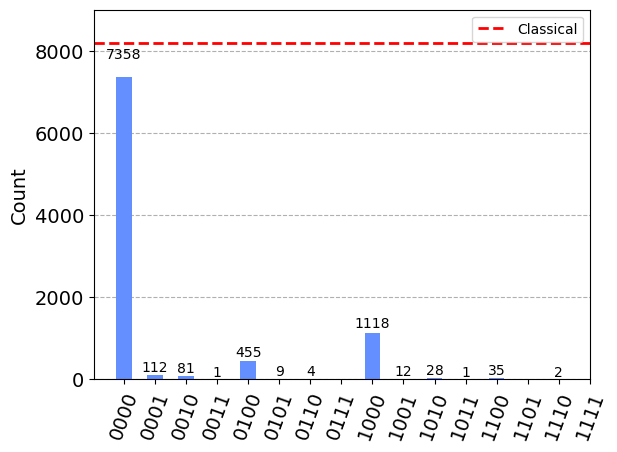

In [103]:


all_counts = {}
all_counts['0000'] = 0 
all_counts['0001'] = 0
all_counts['0010'] = 0
all_counts['0011'] = 0 
all_counts['0100'] = 0
all_counts['0101'] = 0
all_counts['0110'] = 0 
all_counts['0111'] = 0 

all_counts['1000'] = 0 
all_counts['1001'] = 0
all_counts['1010'] = 0
all_counts['1011'] = 0 
all_counts['1100'] = 0
all_counts['1101'] = 0
all_counts['1110'] = 0 
all_counts['1111'] = 0 

for key in counts:
    
    for measurement in counts[key]:
        
        all_counts[measurement] += counts[key][measurement]
        
print(all_counts)
fig, ax = plt.subplots()
plot_histogram(all_counts, figsize = (7,7), ax = ax)
axhline((8/9) * 1024 * 9, color = 'r', linestyle = 'dashed', linewidth=2, label = 'Classical')
plt.legend()
plt.ylim([0, 9000])
fig.savefig('merminperes-braket-{0}.png'.format(qdevice), bbox_inches = 'tight', pad_inches = .25)
plt.show()


try:
    file = open('merminperes-braket-{0}-counts.txt'.format(qdevice), 'a')
    file.write(str(all_counts))
    file.close()
  
except:
    print("Unable to append to file")


In [ ]:
def concatenate_counts(counts):
    
    all_counts = {}
    all_counts['0000'] = 0 
    all_counts['0001'] = 0
    all_counts['0010'] = 0
    all_counts['0011'] = 0 
    all_counts['0100'] = 0
    all_counts['0101'] = 0
    all_counts['0110'] = 0 
    all_counts['0111'] = 0 

    all_counts['1000'] = 0 
    all_counts['1001'] = 0
    all_counts['1010'] = 0
    all_counts['1011'] = 0 
    all_counts['1100'] = 0
    all_counts['1101'] = 0
    all_counts['1110'] = 0 
    all_counts['1111'] = 0 

    for key in counts:
    
        for measurement in counts[key]:
            
            all_counts[measurement] += counts[key][measurement]
    
    return all_counts

In [ ]:
def get_probabilties_from_counts(counts):
    
    total_number_of_shots = 0
    
    all_probabilities = {}
    all_probabilities['0000'] = 0 
    all_probabilities['0001'] = 0
    all_probabilities['0010'] = 0
    all_probabilities['0011'] = 0 
    all_probabilities['0100'] = 0
    all_probabilities['0101'] = 0
    all_probabilities['0110'] = 0 
    all_probabilities['0111'] = 0 
    all_probabilities['1000'] = 0 
    all_probabilities['1001'] = 0
    all_probabilities['1010'] = 0
    all_probabilities['1011'] = 0 
    all_probabilities['1100'] = 0
    all_probabilities['1101'] = 0
    all_probabilities['1110'] = 0 
    all_probabilities['1111'] = 0 

    for key in counts:
    
        for measurement in counts[key]:
        
            all_probabilities[measurement] += counts[key][measurement]
            total_number_of_shots += counts[key][measurement]

    for measurement in all_probabilities.keys():
        all_probabilities[measurement] = all_probabilities[measurement]/total_number_of_shots
        
    return all_probabilities
        
    
    

{'0000': 0.7983940972222222, '0001': 0.012152777777777778, '0010': 0.0087890625, '0011': 0.00010850694444444444, '0100': 0.049370659722222224, '0101': 0.0009765625, '0110': 0.00043402777777777775, '0111': 0.0, '1000': 0.1213107638888889, '1001': 0.0013020833333333333, '1010': 0.0030381944444444445, '1011': 0.00010850694444444444, '1100': 0.0037977430555555555, '1101': 0.0, '1110': 0.00021701388888888888, '1111': 0.0}


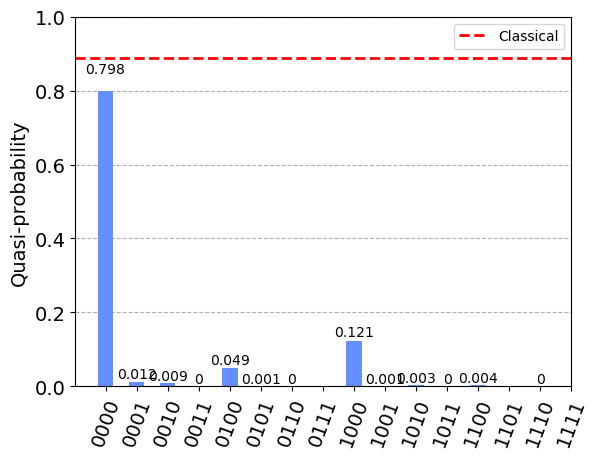

In [111]:
all_probabilities = {}
all_probabilities['0000'] = 0 
all_probabilities['0001'] = 0
all_probabilities['0010'] = 0
all_probabilities['0011'] = 0 
all_probabilities['0100'] = 0
all_probabilities['0101'] = 0
all_probabilities['0110'] = 0 
all_probabilities['0111'] = 0 

all_probabilities['1000'] = 0 
all_probabilities['1001'] = 0
all_probabilities['1010'] = 0
all_probabilities['1011'] = 0 
all_probabilities['1100'] = 0
all_probabilities['1101'] = 0
all_probabilities['1110'] = 0 
all_probabilities['1111'] = 0 

for key in counts:
    
    for measurement in counts[key]:
        
        all_probabilities[measurement] += counts[key][measurement]

for measurement in all_probabilities.keys():
    all_probabilities[measurement] = all_probabilities[measurement]/(9*1024)
        
print(all_probabilities)
fig, ax = plt.subplots()
plot_histogram(all_probabilities, figsize = (7,7), ax = ax)
axhline(8/9, color = 'r', linestyle = 'dashed', linewidth=2, label = 'Classical')
plt.legend()
plt.ylim([0, 1])
fig.savefig('merminperes-braket-{0}-probabilities.png'.format(qdevice), bbox_inches = 'tight', pad_inches = .25)
plt.show()


try:
    file = open('merminperes-braket-{0}-probabilities.txt'.format(qdevice), 'a')
    file.write(str(all_probabilities))
    file.close()
  
except:
    print("Unable to append to file")

